In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [50]:
FIN_PATH = "/home/peter/Documents/uni/FIN-Dataset"
scene = "conferenceRoom"

In [14]:
def gather_dfs(scene: str):
    root = os.path.join(FIN_PATH, scene)
    data = dict()
    for subdir in os.listdir(root):
        if not os.path.isdir(os.path.join(root, subdir)) or subdir == "GT":
            continue
        metrics_path = os.path.join(FIN_PATH, scene, subdir, "metrics", f"{subdir}-{scene}.csv")
        sim_path = os.path.join(FIN_PATH, scene, subdir, "metrics", f"{subdir}-{scene}-sim.csv")
        print(sim_path)
        metrics = pd.read_csv(metrics_path)
        sim = pd.read_csv(sim_path)
        metrics["Symmetric Similarity"] = sim["Symmetric Similarity"]
        data[subdir] = metrics
    return data

In [51]:
data = gather_dfs(scene)

/home/peter/Documents/uni/FIN-Dataset/conferenceRoom/draco/metrics/draco-conferenceRoom-sim.csv
/home/peter/Documents/uni/FIN-Dataset/conferenceRoom/tmc3/metrics/tmc3-conferenceRoom-sim.csv
/home/peter/Documents/uni/FIN-Dataset/conferenceRoom/pccomp/metrics/pccomp-conferenceRoom-sim.csv


In [53]:
files =  [file.split("-")[0][1:] for file in os.listdir(os.path.join(FIN_PATH, scene)) if os.path.isfile(os.path.join(FIN_PATH, scene, file)) and file.endswith(".ply")]
num_clouds = max(map(int, files))+1
x = np.arange(num_clouds)
len(x)

131

131
131
131


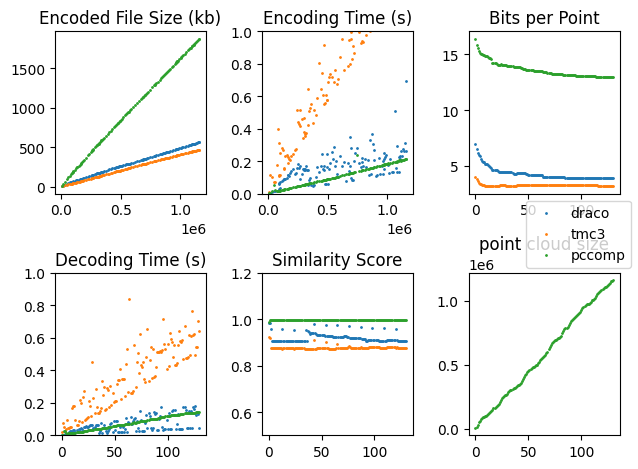

In [54]:
fig, axs = plt.subplots(2,3)
ls = []
algorithms = []
for algorithm, df in data.items():
    algorithms.append(algorithm)
    bpps = df["bpp"]
    enc_size = df["enc_file_size_bits"]/8000
    print(len(enc_size))
    time_enc = df["time_enc_ns"]/10**9
    time_dec = df["time_dec_ns"]/10**9
    points = df["num_points"]
    similarity = df["Symmetric Similarity"]
    l = axs[0, 0].scatter(points, enc_size, s=1)
    ls.append(l)
    axs[0, 0].set_title("Encoded File Size (kb)")
    axs[0, 1].scatter(points, time_enc, s=1)
    axs[0, 1].set_title("Encoding Time (s)")
    axs[1, 0].scatter(x, time_dec, s=1)
    axs[1, 0].set_title("Decoding Time (s)")
    axs[1, 1].scatter(x, similarity, s=1)
    axs[1, 1].set_title("Similarity Score")
    axs[0, 2].scatter(x, bpps, s=1)
    axs[0, 2].set_title("Bits per Point")
    axs[1, 1].set_ylim([0.5, 1.2])
    axs[0, 1].set_ylim([0, 1])
    axs[1, 0].set_ylim([0, 1])
axs[1, 2].scatter(x, points, s=1, color="tab:green")
axs[1, 2].set_title("point cloud size")
fig.legend(ls, algorithms, loc="center right")
fig.tight_layout()
plt.show()

131
131
131


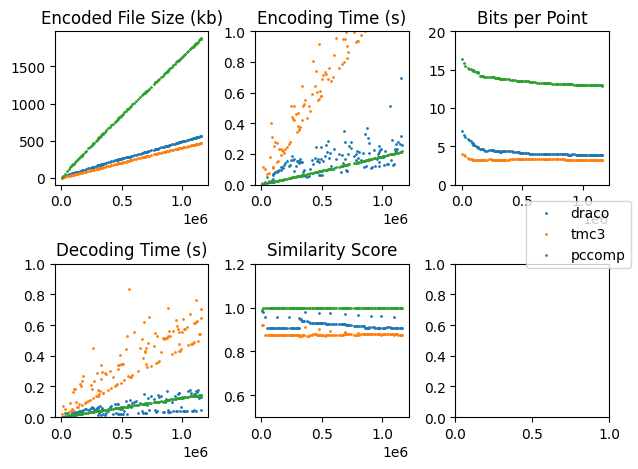

In [55]:
fig, axs = plt.subplots(2,3)
ls = []
algorithms = []
for algorithm, df in data.items():
    algorithms.append(algorithm)
    bpps = df["bpp"]
    enc_size = df["enc_file_size_bits"]/8000
    print(len(enc_size))
    time_enc = df["time_enc_ns"]/10**9
    time_dec = df["time_dec_ns"]/10**9
    points = df["num_points"]
    similarity = df["Symmetric Similarity"]
    l = axs[0, 0].scatter(points, enc_size, s=1)
    ls.append(l)
    axs[0, 0].set_title("Encoded File Size (kb)")
    axs[0, 1].scatter(points, time_enc, s=1)
    axs[0, 1].set_title("Encoding Time (s)")
    axs[1, 0].scatter(points, time_dec, s=1)
    axs[1, 0].set_title("Decoding Time (s)")
    axs[1, 1].scatter(points, similarity, s=1)
    axs[1, 1].set_title("Similarity Score")
    axs[0, 2].scatter(points, bpps, s=1)
    axs[0, 2].set_title("Bits per Point")
    axs[1, 1].set_ylim([0.5, 1.2])
    axs[0, 2].set_ylim([0, 20])
    axs[0, 1].set_ylim([0, 1])
    axs[1, 0].set_ylim([0, 1])
fig.legend(ls, algorithms, loc="center right")
fig.tight_layout()
plt.show()